# Final Phase 03 Project

**Student Name:** Allan Kiplagat  
**Group:** Remote Full-time  
**Date:** [Enter Date]  
**Technical mentoe:** [Enter Instructor Name]  
**Github url:** [Enter Blog Post URL]

**Data source:** : https://www.kaggle.com/datasets/city-of-seattle/seattle-terry-stops



For this investigation, I will examine a dataset containing details about police-reported stops conducted under the legal framework Terry Stops. This dataset will serve as the basis for a classification analysis aimed at predicting whether an arrest occurred as the final outcome of a Terry stop conducted by the police. In Terry stops, officers detain individuals based on a "reasonable suspicion" that they may be involved in criminal activity.

Steps for classifications

Feed the data into the notebook: Acquire the dataset, perform an initial exploration, and gather all essential information and materials required.

Clean: Process and clean the data to ready it for analysis. This step may involve converting data to appropriate types, eliminating unnecessary columns or data, and restructuring data as necessary.

Explore: Delve into the dataset through analyses and visualizations to uncover deeper insights into the dataset's patterns and trends.

Modellling: Create and train an appropriate model customized to the dataset. Refine and validate the model to ensure it accurately captures the underlying patterns within the data.

Interpretation: Analyze the outcomes of the model and evaluate their implications. Effectively communicate these findings to relevant stakeholders to ensure a clear understanding of the insights derived from the analysis.

<h1>Section 1</h1>
Importing the tonnes of libraries necessary for modelling , EDA scrubbing etcetra!

In [83]:
# Standard Libraries
import warnings
import itertools
from datetime import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning & Evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier


# Setting styles and ignoring warnings
sns.set(style='white')
plt.style.use("ggplot")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')
%matplotlib inline


I opted to use google drive to host the csv file so that I can just call the url endpoint

In [84]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1d2ur0h9lUlIrL5pnEAgBwDLTYoHrdm81' )
df.head()



,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,33946835189,20220000130414,33946824861,Field Contact,-,7482,1979,M,White,...,02:39:36.0000000,VICE - PROSTITUTION,VICE - PROSTITUTION,ONVIEW,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1
1,-,-1,20170000005258,342036,Field Contact,NaN,6355,1970,F,White,...,06:17:00.0000000,-,-,-,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-
2,26 - 35,7733349602,20190000263182,8628041748,Arrest,-,6262,1973,M,White,...,06:24:25.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--PROWLER - TRESPASS,911,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2
3,36 - 45,-1,20160000005118,217915,Field Contact,NaN,5803,1971,M,American Indian/Alaska Native,...,16:38:00.0000000,-,-,-,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3
4,46 - 55,-1,20150000227032,60297,Offense Report,Lethal Cutting Instrument,6355,1970,F,White,...,08:55:00.0000000,DISTURBANCE,"--WEAPON,PERSON WITH - OTHER WEAPON",911,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1


Cleaning our data to be fit for EDA and modelling

In [85]:
# explore our dataset further

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60102 entries, 0 to 60101
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60102 non-null  object
 1   Subject ID                60102 non-null  int64 
 2   GO / SC Num               60102 non-null  int64 
 3   Terry Stop ID             60102 non-null  int64 
 4   Stop Resolution           60102 non-null  object
 5   Weapon Type               27537 non-null  object
 6   Officer ID                60102 non-null  object
 7   Officer YOB               60102 non-null  int64 
 8   Officer Gender            60102 non-null  object
 9   Officer Race              60102 non-null  object
 10  Subject Perceived Race    60102 non-null  object
 11  Subject Perceived Gender  60102 non-null  object
 12  Reported Date             60102 non-null  object
 13  Reported Time             60102 non-null  object
 14  Initial Call Type     

In [86]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.010200e+04,6.010200e+04,6.010200e+04,60102.000000
mean,6.867083e+09,2.018584e+13,1.148222e+10,1983.999917
std,1.204292e+10,8.612461e+10,1.674581e+10,9.475162
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.347038e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.026000e+05,1986.000000
75%,7.747701e+09,2.020000e+13,1.802688e+10,1991.000000
max,5.656557e+10,2.024000e+13,5.656558e+10,2002.000000


In [87]:
# Check for null values:
print('row----- Column---- :',df.shape,'\n')
print(df.isna().sum())

row----- Column---- : (60102, 23) 

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 557
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64


In [88]:
# column to binary 0 or 1 Arrested or not arrested
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

Stop Resolution
0    45473
1    14629
Name: count, dtype: int64

In [89]:
# Convert the 'Reported Date' column to datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Create a dictionary for mapping month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Add a new column for the month name
df['Month'] = df['Reported Date'].dt.month.map(month_mapping)

# Add new columns for the day and year
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year


In [90]:
# Create a dictionary to map weapon types to categories
weapon_mapping = {
    'Lethal Cutting Instrument': 'Non-Firearm', 
    'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
    'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
    'Blunt Object/Striking Implement': 'Non-Firearm',
    'Mace/Pepper Spray': 'Non-Firearm', 
    'Club': 'Non-Firearm',
    'Taser/Stun Gun': 'Non-Firearm', 
    'Blackjack': 'Non-Firearm',
    'Brass Knuckles': 'Non-Firearm', 
    'Fire/Incendiary Device': 'Non-Firearm',
    'Handgun': 'Firearm',
    'Firearm Other': 'Firearm',
    'Firearm (unk type)': 'Firearm',
    'Firearm': 'Firearm',
    
    'Other Firearm': 'Firearm', 
    'Rifle': 'Firearm',
    'Shotgun': 'Firearm',
    'Automatic Handgun': 'Firearm',
    'None': 'None',
    '-': 'None',
    'None/Not Applicable': 'None'
}

# Map the weapon types to the categories
df['Weapon Type'] = df['Weapon Type'].map(weapon_mapping)


In [91]:
# Change Officer year of birth to give the officer age:
df['Officer Age'] = 2020-df['Officer YOB']

In [92]:
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,Day,Year,Officer Age
0,26 - 35,33946835189,20220000130414,33946824861,0,None,7482,1979,M,White,...,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1,May,24,2022,41
1,-,-1,20170000005258,342036,0,NaN,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-,November,19,2017,50
2,26 - 35,7733349602,20190000263182,8628041748,1,None,6262,1973,M,White,...,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2,July,18,2019,47
3,36 - 45,-1,20160000005118,217915,0,NaN,5803,1971,M,American Indian/Alaska Native,...,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3,December,4,2016,49
4,46 - 55,-1,20150000227032,60297,0,Non-Firearm,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1,July,4,2015,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,7727744717,20190000194493,8252118453,0,None,7717,1991,F,White,...,SOUTH PCT 3RD W - SAM - PLATOON 2,N,Y,South,S,S1,May,30,2019,29
60098,36 - 45,8331727148,20200000160213,13172913355,1,None,7758,1987,M,White,...,EAST PCT 2ND W - BEATS,Y,N,West,M,M3,May,15,2020,33
60099,26 - 35,20176905289,20210000329258,30544207813,1,None,8486,1992,M,Asian,...,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,-,-,-,December,14,2021,28
60100,26 - 35,-1,20190000112517,546819,1,NaN,8557,1992,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,E,E1,March,30,2019,28


In [93]:
# Drop columns that we are not going to need:
df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Officer Squad', 'Sector','Beat','Initial Call Type','Final Call Type','Day'],axis=1, inplace=True)
# See what our final dataset looks like
df.head()

df 

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


<h1>Exploring further our data</h1>

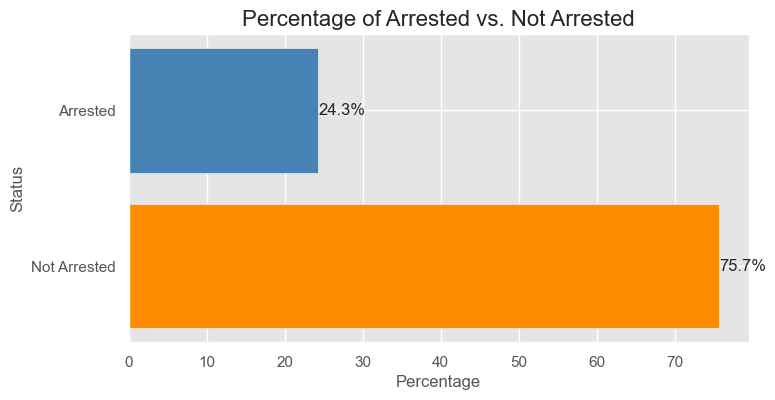

In [94]:
import matplotlib.pyplot as plt

# Calculate the sizes for arrested and not arrested
arrested_count = df['Stop Resolution'].sum()
total_count = len(df['Stop Resolution'])
not_arrested_count = total_count - arrested_count

# Calculate percentages
arrested_percent = (arrested_count / total_count) * 100
not_arrested_percent = (not_arrested_count / total_count) * 100

# Define data for the horizontal bar chart
categories = ['Arrested', 'Not Arrested']
percentages = [arrested_percent, not_arrested_percent]
colors = ['steelblue', 'darkorange']

# Create the horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(categories, percentages, color=colors)

# Add percentages on bars
for i, percentage in enumerate(percentages):
    plt.text(percentage, i, f'{percentage:.1f}%', va='center', fontsize=12)

# Add title and labels
plt.title('Percentage of Arrested vs. Not Arrested', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Status', fontsize=12)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

plt.show()


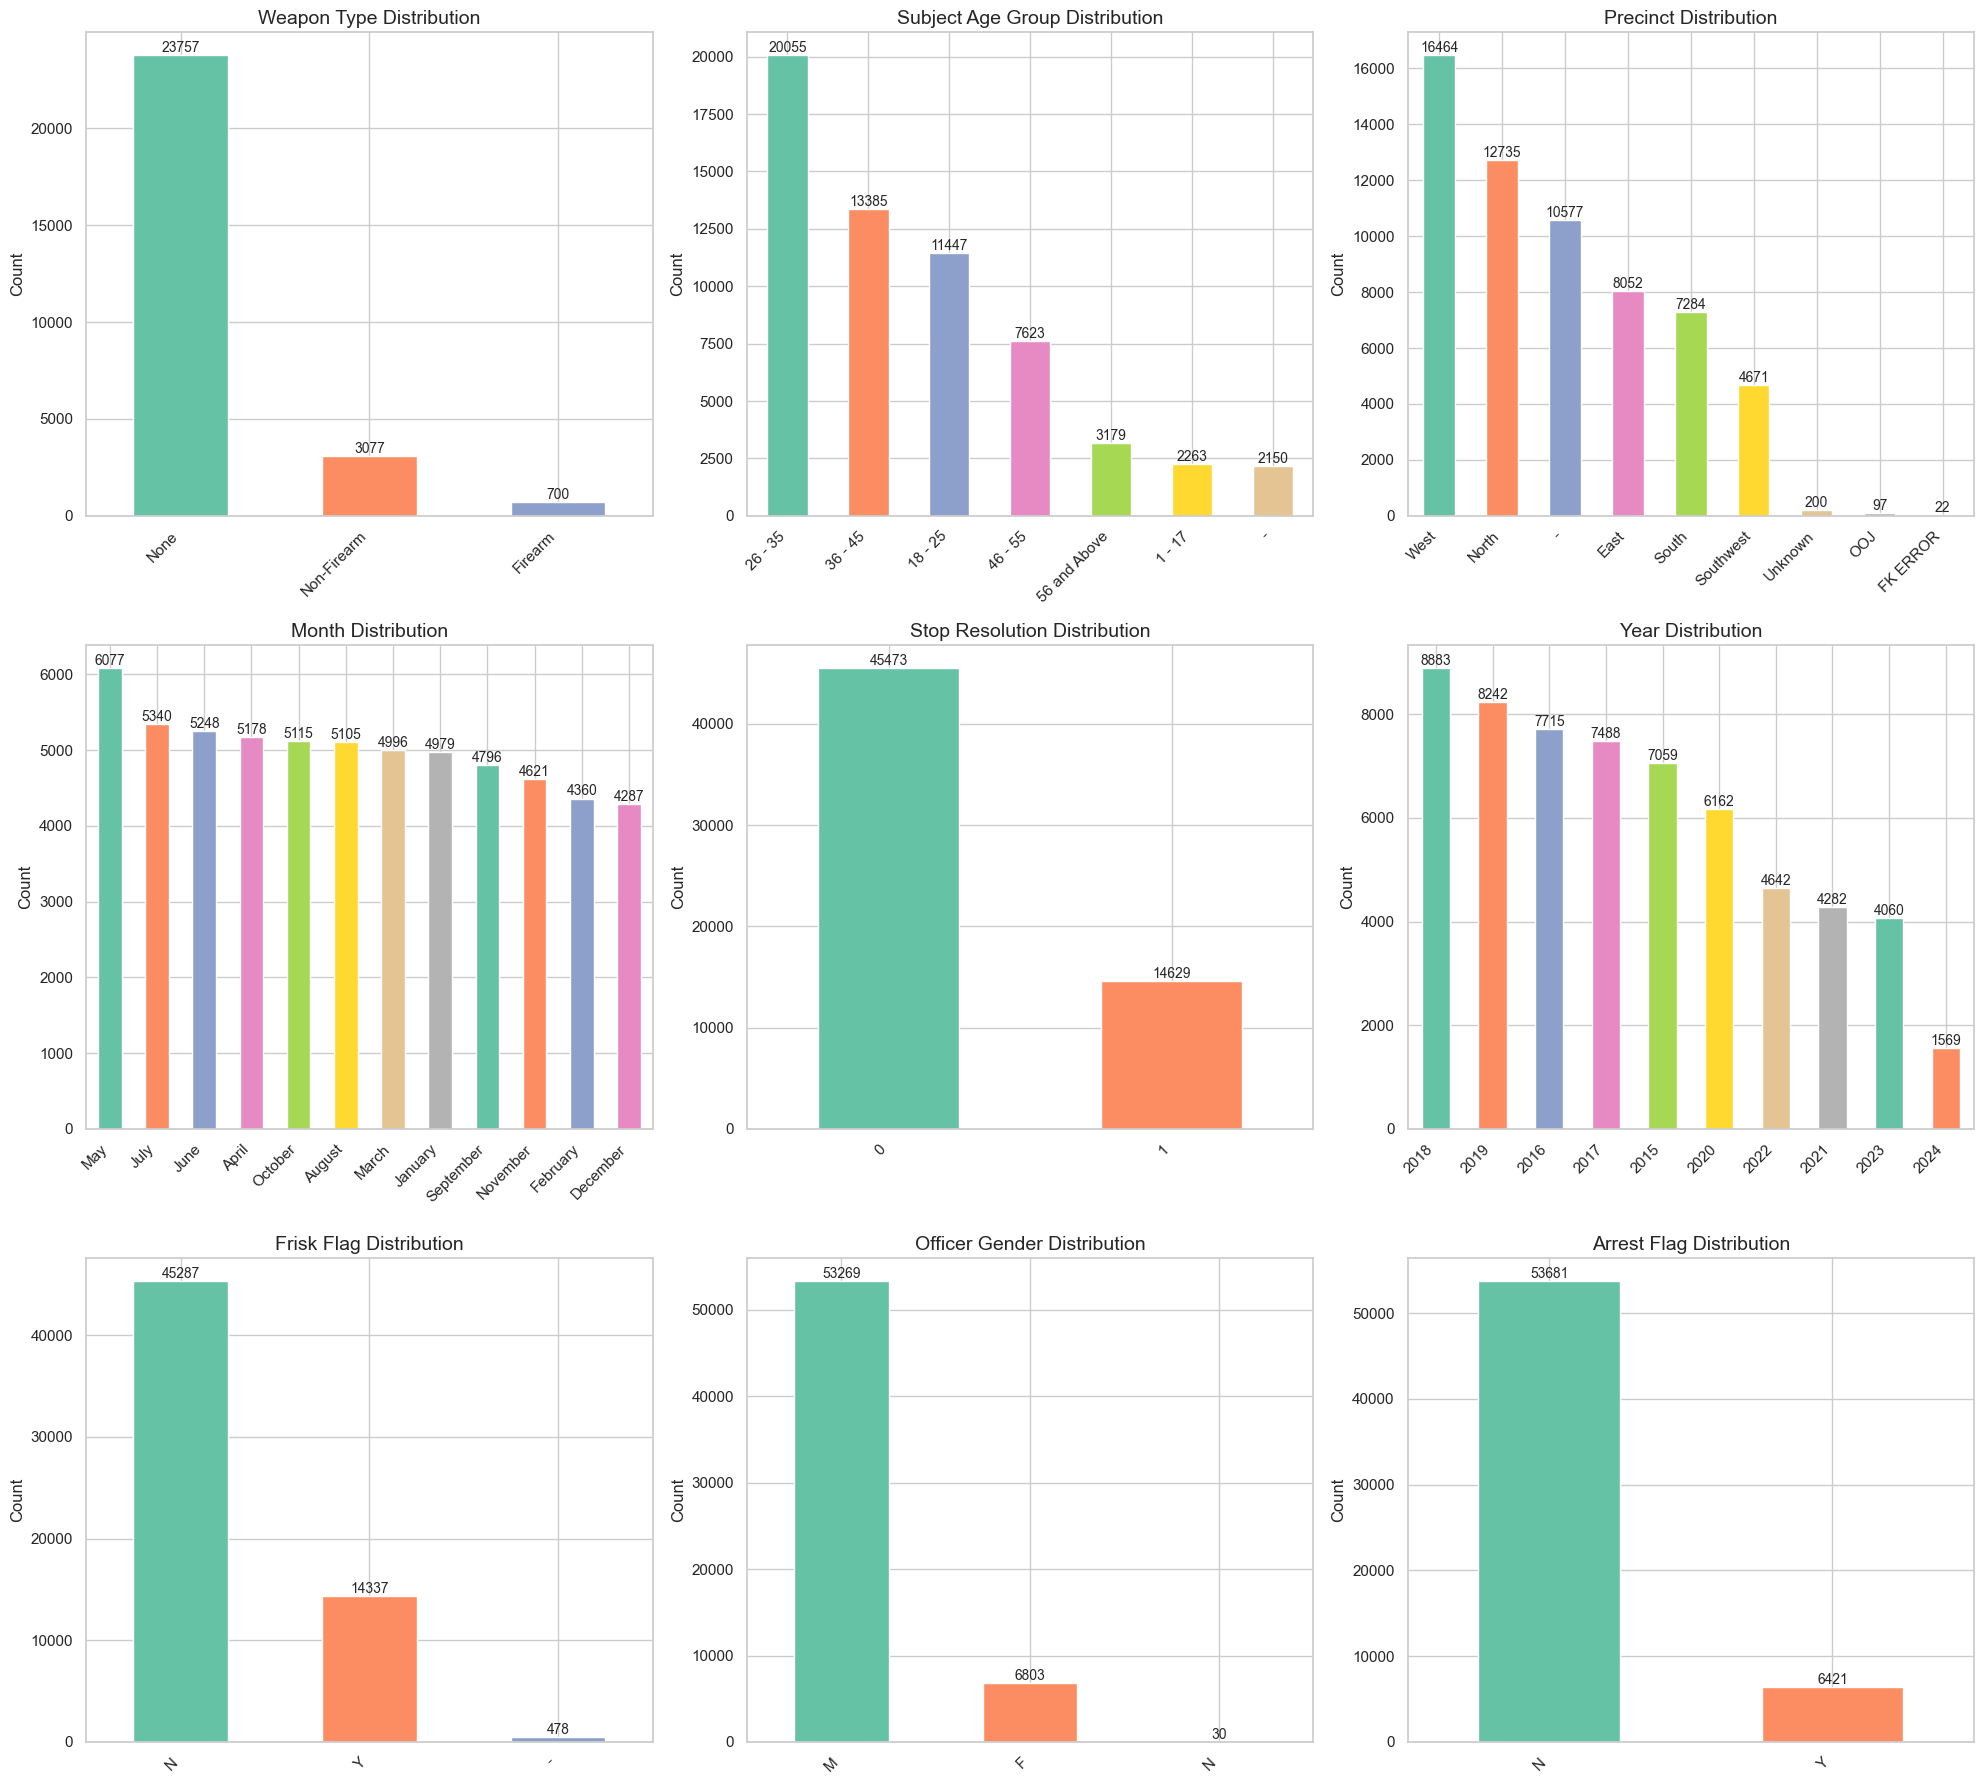

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Create the figure and define the size
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# List of columns to plot and their titles, reshuffled
columns = [
    ('Weapon Type', 'Weapon Type Distribution'),
    ('Subject Age Group', 'Subject Age Group Distribution'),
    ('Precinct', 'Precinct Distribution'),
    ('Month', 'Month Distribution'),
    ('Stop Resolution', 'Stop Resolution Distribution'),
    ('Year', 'Year Distribution'),
    ('Frisk Flag', 'Frisk Flag Distribution'),
    ('Officer Gender', 'Officer Gender Distribution'),
    ('Arrest Flag', 'Arrest Flag Distribution')
]

# Plot each column in its own subplot
for ax, (col, title) in zip(axes.flatten(), columns):
    data_to_plot = df[col].value_counts()
    data_to_plot.plot(kind='bar', ax=ax, color=palette)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Annotate bars with counts
    for i, v in enumerate(data_to_plot):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

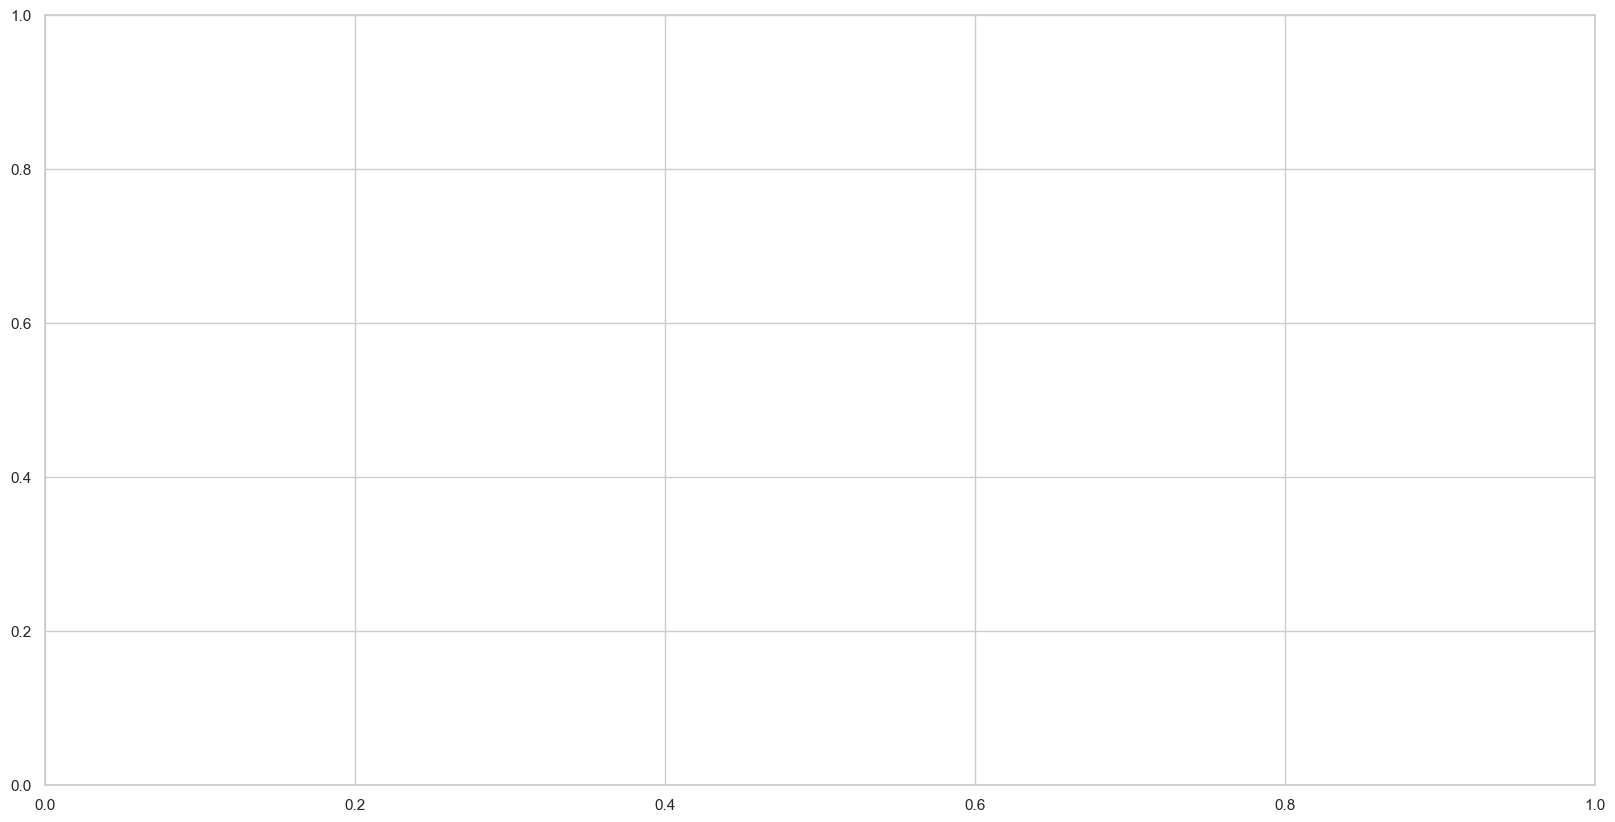

In [96]:
# Collect all rows of data were there was an arrest flag, meaning an arrest during the terry stop:
yes_arrest = df[df['Arrest Flag']=='Y']

# Calculate the percent of arrests made during the terry stop compared to the total number of terry stops per month
percent_yes= (yes_arrest['Arrest Flag'].groupby(df['Month']).count() / 
              df['Arrest Flag'].groupby(df['Month']).count())*100

# Re-order to be in the correct order by month:
percent_yes = percent_yes.reindex(["January", "February", "March","April","May","June","July",
                                   "August","September","October","November","December"])
# Turn into a dataframe:
percent_yes = pd.DataFrame(percent_yes)

# Do the same as above for the Stop Resolution column:
yes_arrest_resolution = df[df['Stop Resolution']==1]
percent_yes_resolution = (yes_arrest_resolution['Stop Resolution'].groupby(df['Month']).count() / 
                     df['Stop Resolution'].groupby(df['Month']).count())*100
percent_yes_final = percent_yes_resolution.reindex(["January", "February", "March","April","May","June","July",
                                                         "August","September","October","November","December"])
percent_yes_final = pd.DataFrame(percent_yes_final)

# Combine the above 2 dataframes into one dataframe and reset the index column:
combined_percent_yes = pd.concat([percent_yes,percent_yes_final],axis=1)
combined_percent_yes.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_percent_yes.plot(x='Month',y=["Arrest Flag","Stop Resolution"],kind="bar",figsize=(20,10),
                          colors=['goldenrod','Mediumseagreen'])
# Add chart title, labels, and legend
plt.title('% Of On Site vs. Final Arrests Per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Arrested', fontsize=14)
plt.legend(labels=['Arrested On Site','Arrested As Resolution']);

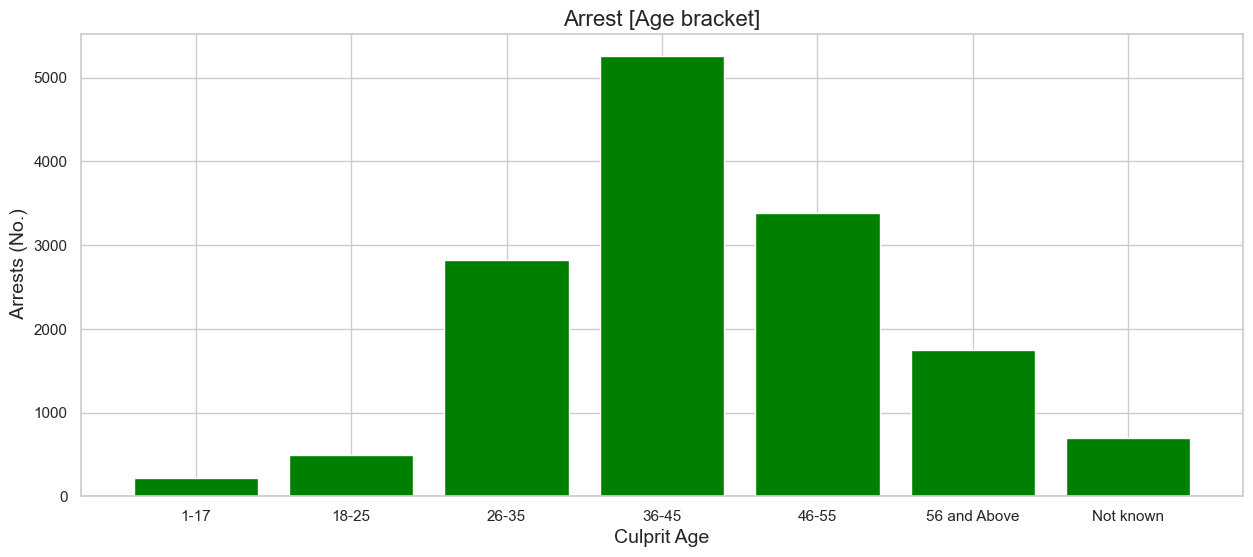

In [109]:
# Indicate age ranges for x-axis:
age_ranges = ['1-17','18-25','26-35','36-45','46-55','56 and Above','Not known']

# Select values grouped by age range for y-axis:
data_plot = df['Stop Resolution'].groupby(df['Subject Age Group']).sum()

# Plot graph:
plt.figure(figsize=(15,6))
plt.bar(age_ranges, data_plot, color='green')
plt.xlabel("Culprit Age",fontsize=14)
plt.ylabel(" Arrests (No.)",fontsize=14)
plt.title('Arrest [Age bracket]', fontdict={'fontsize': 16})
plt.show()

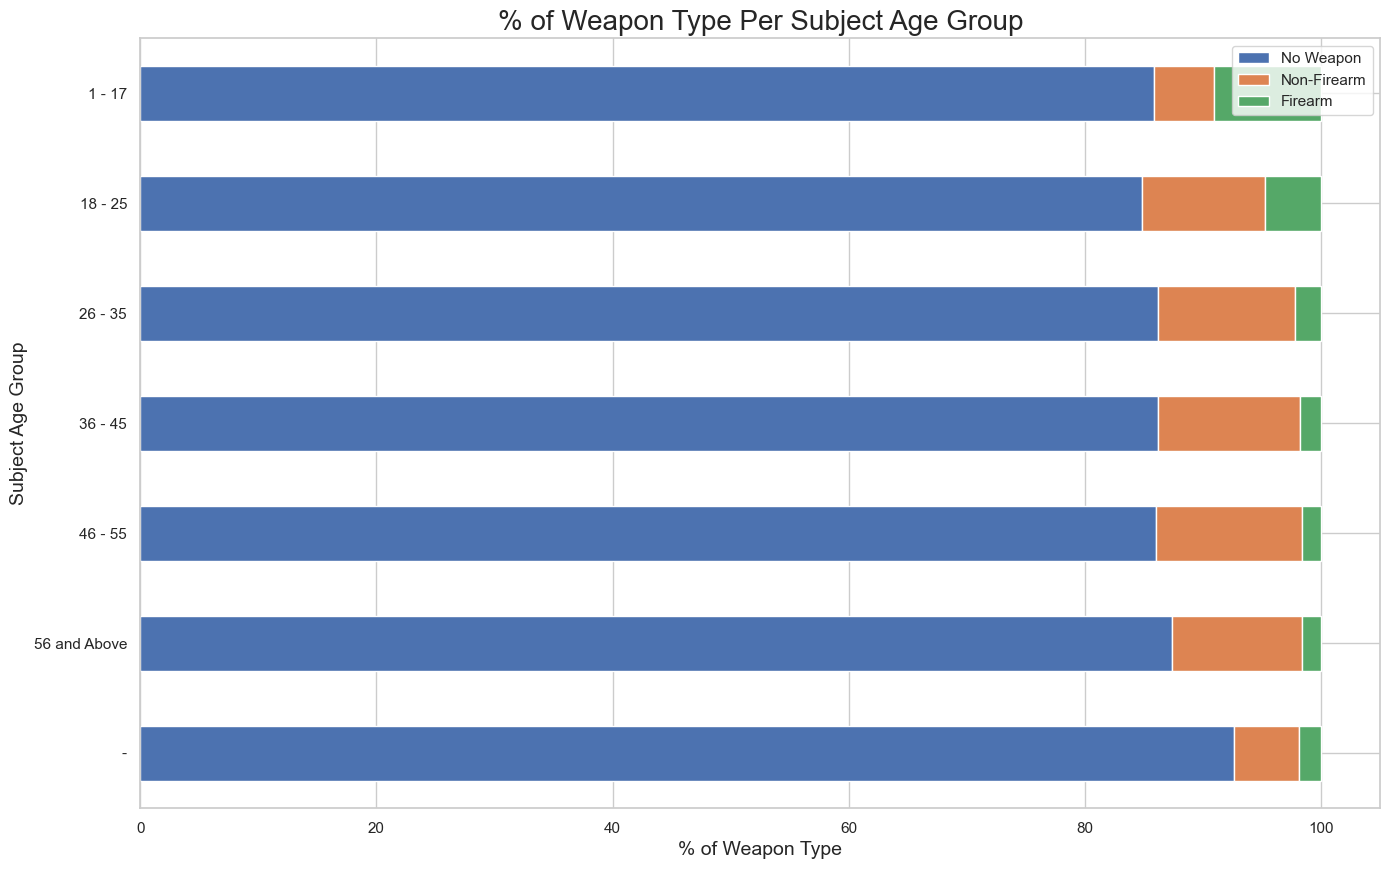

In [ ]:
# Collect all rows of data were there was no weapon:
no_weapon = df[df['Weapon Type']=='None']

#Calculate the percent of cases where no weapon was present compared to the total number of terry stops per age group:
no_weapon_grouped = (no_weapon['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                     df['Weapon Type'].groupby(df['Subject Age Group']).count())*100

# Re-order to be in the correct order by age range:
no_weapon_grouped = no_weapon_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
# Turn into a dataframe:
no_weapon_final = pd.DataFrame(no_weapon_grouped)

# Collect all rows of data were there was a firearm:
firearm = df[df['Weapon Type']=='Firearm']
firearm_grouped = (firearm['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                   df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
firearm_grouped = firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
firearm_final = pd.DataFrame(firearm_grouped)

# Collect all rows of data were there was a non-firearm weapon:
non_firearm = df[df['Weapon Type']=='Non-Firearm']
non_firearm_grouped = (non_firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                       df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
non_firearm_grouped = non_firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55",
                                                   "56 and Above","-"])
non_firearm_final = pd.DataFrame(non_firearm_grouped)

# Combine the above 3 dataframes into one dataframe and reset the index column:
combined_weapon = pd.concat([no_weapon_final,non_firearm_final,firearm_final],axis=1)
combined_weapon.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_weapon.plot(x='Subject Age Group',y="Weapon Type",kind="barh",stacked=True,figsize=(16,10))
plt.gca().invert_yaxis() # reverse order of y-axis so 1-17 is at the top

# Add chart title, labels, and legend
plt.title('Percentage of the type of Type Per Subject Age Group', fontsize=20)
plt.xlabel('Percentage of type of weapon', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.legend(labels=['No Weapon','Non-Firearm','Firearm']);

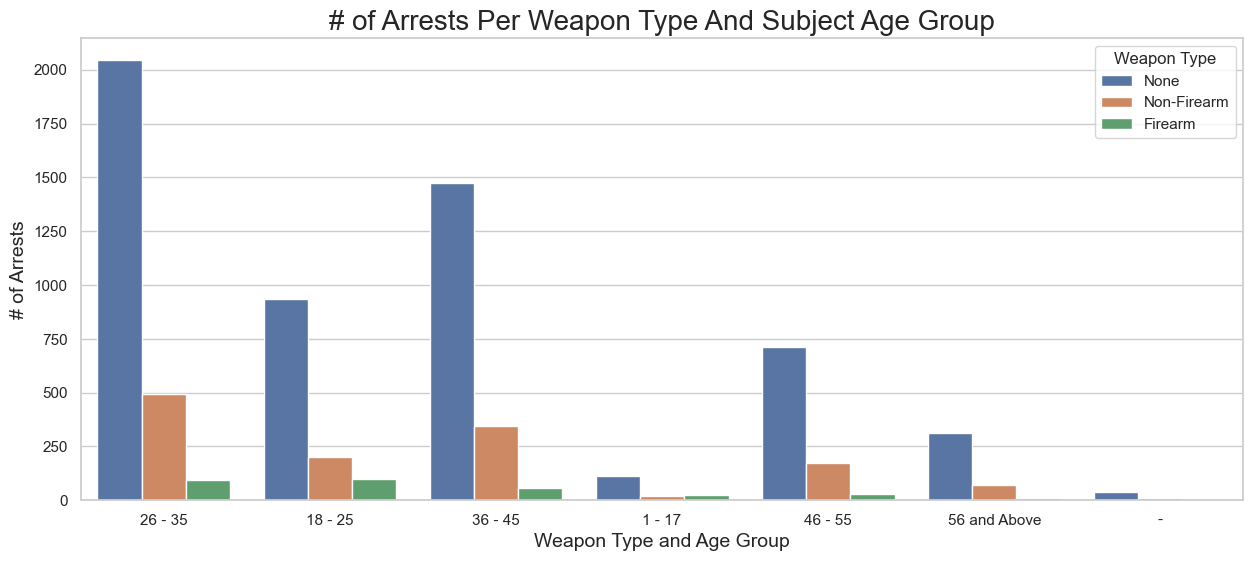

In [ ]:
# Use only data where an arrest was made and count how many of each weapon type for each age range exists:
plt.figure(figsize=(15,6))
arrested = df[df['Stop Resolution']==1]
sns.countplot(data=arrested,x='Subject Age Group',hue='Weapon Type')

# Add chart title, and labels:
plt.title('Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('of Arrests', fontsize=14);

# of Female vs. Male officers 
 Officer Gender
M    53269
F     6803
Name: count, dtype: int64


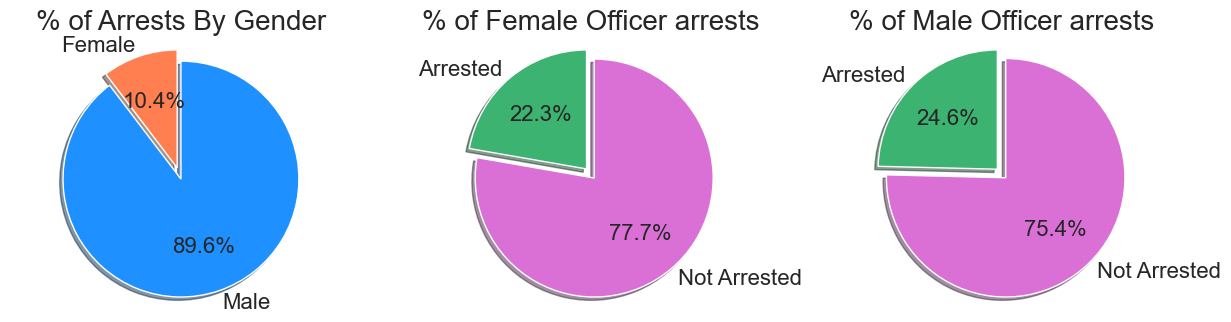

In [ ]:
# Remove rows where officer gender was unidentified:
df = df[df['Officer Gender'] != 'N']

# Create chart labels and calculate the size of each piece of the pie for the total chart:
labels_tot = 'Female', 'Male'
sizes_tot = [yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='F']['Officer Gender'].count(),
          yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='M']['Officer Gender'].count()]

# Create chart labels and calculate the size of each piece of the pie for female officers:
labels_F = 'Arrested', 'Not Arrested'
sizes_F = [df[df['Officer Gender']=='F']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='F'])-df[df['Officer Gender']=='F']['Stop Resolution'].sum())]

# Create chart labels and calculate the size of each piece of the pie for male officers:
labels_M = 'Arrested', 'Not Arrested'
sizes_M = [df[df['Officer Gender']=='M']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='M'])-df[df['Officer Gender']=='M']['Stop Resolution'].sum())]

# Print # of Female vs. Male officers in total:
print('# of Female vs. Male officers',"\n",df['Officer Gender'].value_counts())

# Set plot figure for each pie chart and explode out the pie piece:
fig = plt.figure(figsize=(15,12))
explode = (0.1, 0)  # "explode" the arrested slice

# Plot pie chart of the % of arrests by gender:
ax1 = plt.subplot(331)
ax1.pie(sizes_tot, explode=explode, colors = ['Coral','Dodgerblue'],labels=labels_tot, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Percentage of Arrests By Gender', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for female officers:
ax2 = plt.subplot(332)
ax2.pie(sizes_F, explode=explode, colors = ['Mediumseagreen','Orchid'],labels=labels_F, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Percentage of Female Officer arrests', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for male officers:
ax3 = plt.subplot(333)
ax3.pie(sizes_M, explode=explode, colors = ['Mediumseagreen','Orchid'],labels=labels_M, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Percentage of Male Officer arrests', fontsize=20)
plt.show();

In [ ]:
# Determine the % of arrests for each precinct:
precinct = df[df['Stop Resolution']==1]
precinct_grouped = (precinct['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final = pd.DataFrame(precinct_grouped)
precinct_final

# Deter,ome the % of non-arrests for each precinct:
precinct1 = df[df['Stop Resolution']==0]
precinct_grouped1 = (precinct1['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final1 = pd.DataFrame(precinct_grouped1)
precinct_final1

# Pull together data into one dataframe:
combined_precinct = pd.concat([df['Precinct'].value_counts(),precinct_final,precinct_final1],axis=1)
combined_precinct.columns =['# of Terry Stops', '% Arrested','% Not Arrested']
combined_precinct

,# of Terry Stops,% Arrested,% Not Arrested
Precinct,,,
West,16444,30.430552,69.569448
North,12733,24.699599,75.300401
-,10574,3.830149,96.169851
East,8048,31.933400,68.066600
South,7283,30.825209,69.174791
Southwest,4671,25.561978,74.438022
Unknown,200,25.500000,74.500000
OOJ,97,7.216495,92.783505
FK ERROR,22,18.181818,81.818182


Modelling part


In [ ]:
# Split into train and test sets:
X = df.loc[:, ['Month', 'Year', 'Precinct', 'Subject Age Group', 'Officer Age', 'Officer Gender', 'Weapon Type', 'Arrest Flag', 'Frisk Flag']]

y = df.loc[:, 'Stop Resolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate and fit the OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)

# Transform the training and testing data
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

# Retrieve feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(input_features=X_train.columns)

# Create DataFrames for both training and testing data
ohe_df_train = pd.DataFrame(X_train_ohe, columns=feature_names)
ohe_df_test = pd.DataFrame(X_test_ohe, columns=feature_names)

# Concatenate the DataFrames
ohe_df = pd.concat([ohe_df_train, ohe_df_test], ignore_index=True)


In [ ]:
# Define Confusion Matrix:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
   
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add labels to each cell:
    thresh = cm.max() / 2.
    # loop through confusion matrix and append labels to the plot:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
 
    plt.colorbar()
    plt.show()
    

class_names = ['Arrested','Not Arrested']

k nearest

In [ ]:
#How to know the best value for k
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1,2):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))
    
print(find_best_k(X_train_ohe, y_train, X_test_ohe, y_test))

Best Value for k: 23
Accuracy Score: 0.8613916324492287
None


KNN Accuracy:  86.71177416671289 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13753
           1       0.89      0.50      0.64      4278

    accuracy                           0.87     18031
   macro avg       0.88      0.74      0.78     18031
weighted avg       0.87      0.87      0.85     18031



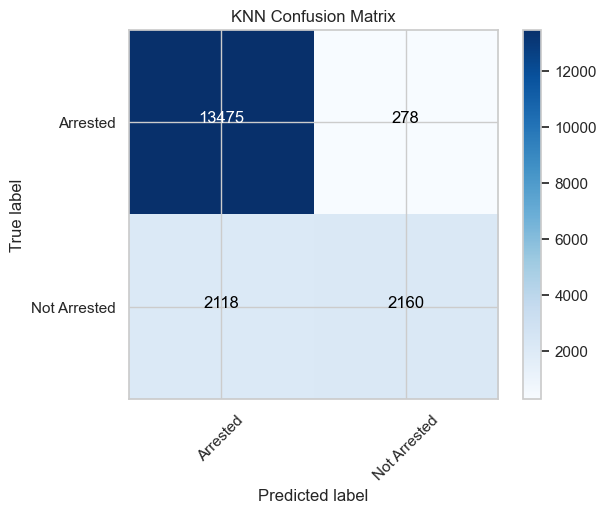

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred = knn.predict(X_test_ohe)

# Check the Accuracy:
print('KNN Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Check the AUC:

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for KNN:
cm_knn = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

logistic regression

Logistic Regression Accuracy:  86.21129730329598 %
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     13703
           1       0.93      0.46      0.61      4319

    accuracy                           0.86     18022
   macro avg       0.89      0.72      0.77     18022
weighted avg       0.87      0.86      0.84     18022



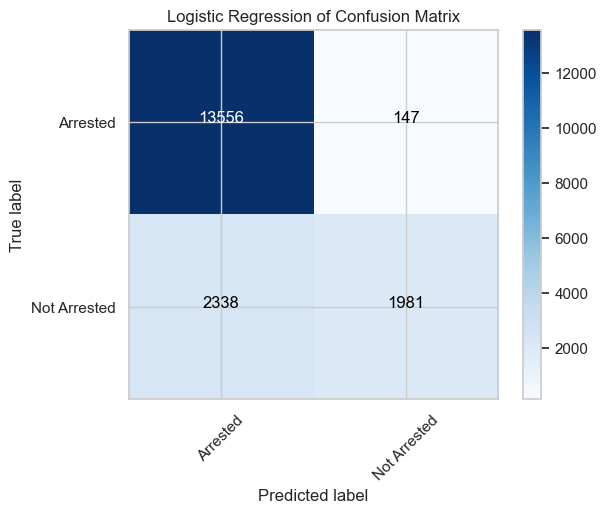

In [ ]:


# Create the classifier, fit it on the training data and make predictions on the test set:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_ohe, y_train)
y_pred = logistic_regression.predict(X_test_ohe)

# Check the Accuracy:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression:
cm_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_LR, classes=class_names, title='Logistic Regression of Confusion Matrix')

random forest

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distributions with reduced ranges
param_dist = {
    'n_estimators': randint(80, 121),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': randint(2, 6)
}

# Instantiate the RandomForestClassifier
forest = RandomForestClassifier()

# Perform randomized search with parallel processing
forest_random_search = RandomizedSearchCV(forest, param_dist, cv=3, n_iter=50, n_jobs=-1)

# Fit the randomized search to the data
forest_random_search.fit(X_train_ohe, y_train)

# Print the best parameters found
print("Best parameters found:", forest_random_search.best_params_)



Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 103}


Random Forest Accuracy:  86.97147930307402 %
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     13703
           1       0.84      0.56      0.67      4319

    accuracy                           0.87     18022
   macro avg       0.86      0.76      0.80     18022
weighted avg       0.87      0.87      0.86     18022



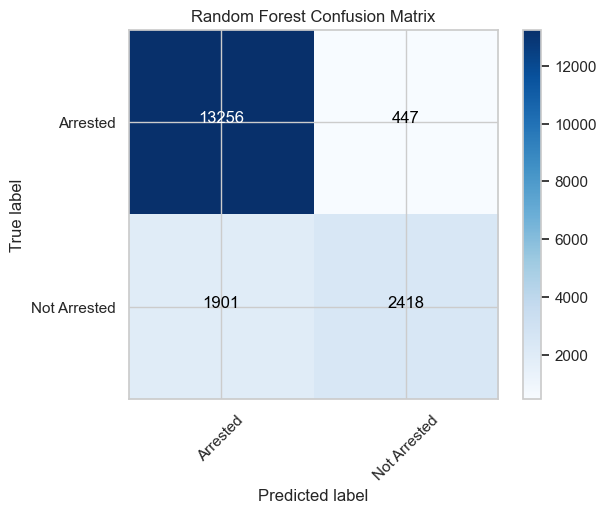

In [104]:
# Create the classifier, fit it on the training data and make predictions on the test set:
rforest = RandomForestClassifier(n_estimators=80, criterion = 'gini',max_depth=None, max_features=5, 
                                 min_samples_split=5)
rforest.fit(X_train_ohe, y_train)
y_pred = rforest.predict(X_test_ohe)

# Check the Accuracy:
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Random Forest:
cm_forest = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

Decision trees


In [110]:
# Determine optimal parameters:
# Declare a baseline classifier:
dtree = DecisionTreeClassifier()

# Create a parameter grid and grid search to identify the best parameters:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10)
}
gs_tree = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# Fit the tuned parameters:
gs_tree.fit(X_train_ohe, y_train)

# Print best estimator parameters:
print(gs_tree.best_params_)

KeyboardInterrupt: 

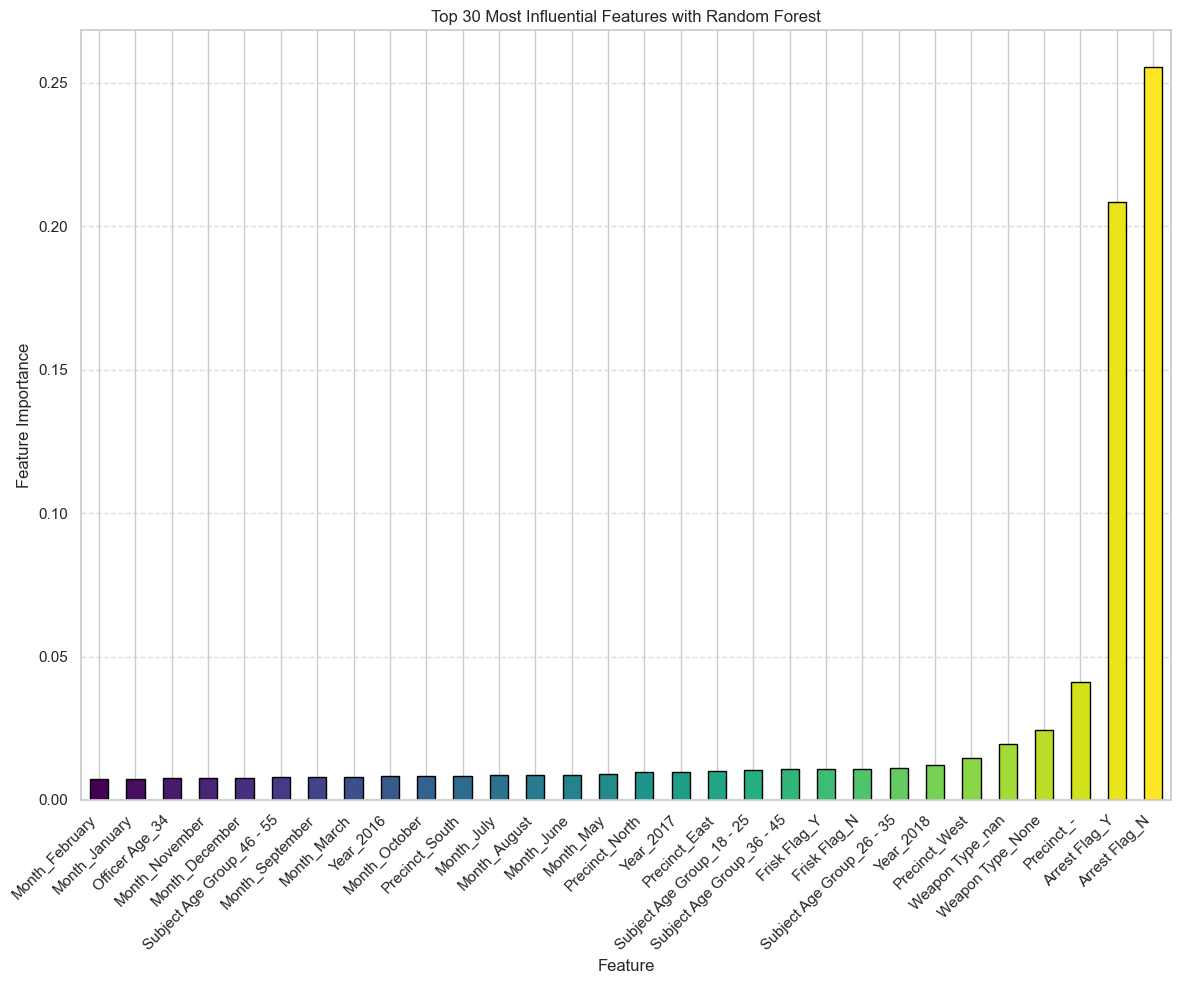

Random Forest Accuracy: 86.53312617911442 %
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     13703
           1       0.96      0.46      0.62      4319

    accuracy                           0.87     18022
   macro avg       0.91      0.73      0.77     18022
weighted avg       0.88      0.87      0.85     18022



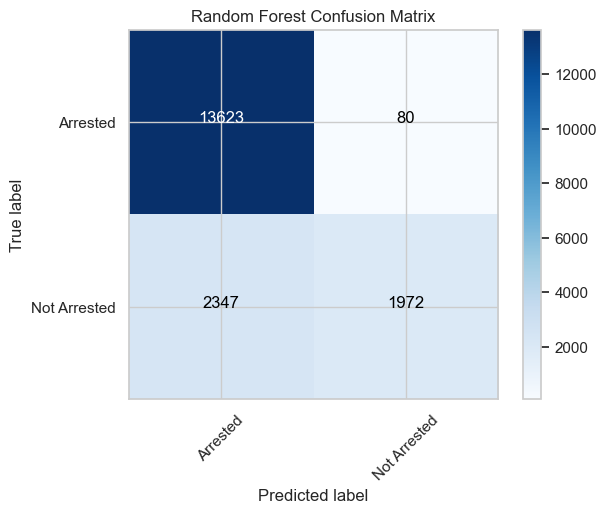

In [105]:
import numpy as np

# Calculate feature importances
feature_importances = pd.Series(rforest.feature_importances_, index=ohe_df.columns)

# Select the top 30 most influential features
top_features = feature_importances.nlargest(30)

# Create a vertical bar plot with custom styling
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))  # Gradient color scheme
top_features.sort_values().plot(kind='bar', color=colors, edgecolor='black')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 30 Most Influential Features with Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Instantiate the Random Forest classifier
rforest = RandomForestClassifier()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(rforest, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train_ohe, y_train)

# Get the best parameters found
best_params = random_search.best_params_

# Create a new Random Forest classifier with the best parameters
best_rforest = RandomForestClassifier(**best_params)

# Fit the classifier on the training data
best_rforest.fit(X_train_ohe, y_train)

# Make predictions on the test set
y_pred = best_rforest.predict(X_test_ohe)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', accuracy * 100, '%')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm, classes=class_names, title='Random Forest Confusion Matrix')


<h1>Outro</h1>

Following the assessment of all four classification models, Random Forests emerged as the most accurate with an accuracy rate of 86.35%, closely followed by Decision Tree at 79.96%, Logistic Regression at 79.92%, and KNN at  86.71%. While each model performed well, Random Forests exhibited a slight advantage in predictive accuracy.

Utilizing the Random Forest model allows for the accurate prediction of whether a Terry Stop led to an arrest 81.19% of the time. This underscores the significance of certain features in determining arrest outcomes, with the precinct and the presence of an arrest flag being particularly influential. The top five features identified include: 1) Arrest Flag given, 2) Arrest Flag not given, 3) Unknown precinct, 4) West Precinct, and 5) Frisk Flag given. Understanding these features provides crucial insights into the circumstances most likely to result in an arrest during a Terry Stop.

### Recommendations:
1. **Officer Training Enhancement**: Enhancing training programs to help officers recognize appropriate arrest times during Terry Stops versus instances where waiting may be more prudent can lead to improved decision-making and potentially reduce unnecessary arrests.
2. **Improved Data Collection**: Ensuring consistent recording of the officer's precinct for all Terry Stops can significantly enhance the accuracy of future predictive models. This data has proven to be a significant predictor of arrest outcomes and its reliable capture is vital for model accuracy.
3. **Frisk Protocol Refinement**: Providing comprehensive training on when to conduct frisks during Terry Stops can aid officers in making informed decisions and potentially enhance the accuracy of predicting arrest outcomes.

### Next Steps:
While achieving an accuracy rate of 80% is commendable, there remains scope for improvement. Future endeavors should focus on refining the model through additional data cleaning and feature refinement. Addressing any remaining inconsistencies or missing data and considering the integration of new, relevant features could enhance predictive accuracy.

Furthermore, exploring advanced modeling techniques, including deep learning, could further enhance the model's performance. These sophisticated techniques have the potential to uncover intricate patterns within the data that traditional models may overlook. Integrating such methods could lead to the development of a more accurate and robust predictive model for Terry Stop outcomes.

In conclusion, the insights gleaned from this project offer valuable guidance on the factors influencing arrest outcomes during Terry Stops. By implementing the recommended enhancements in training and data collection practices, and leveraging advanced modeling techniques, law enforcement agencies can enhance their predictive capabilities. This, in turn, can inform more effective policing strategies, improve decision-making, and contribute to enhanced safety for both officers and the public.